## Picking up from where we left off in Project 3_Credit Card Default Classifier

# Section 5: Feature Engineering/Selection/Importance

### Section 5.1.2: Financial Segmentation

#### Section 5.1.2.1: Consumption for Each Month

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import relevant packages
seed = 69 # Set the random seed for the entire document


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

import time
import pickle

In [5]:
# Opening new pickled dataframe
with open('vanilla_dataframe.pickle','rb') as read_file:
     df = pickle.load(read_file)
df.head(5)

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Section 5.2: Feature Selection/Importance

In [6]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


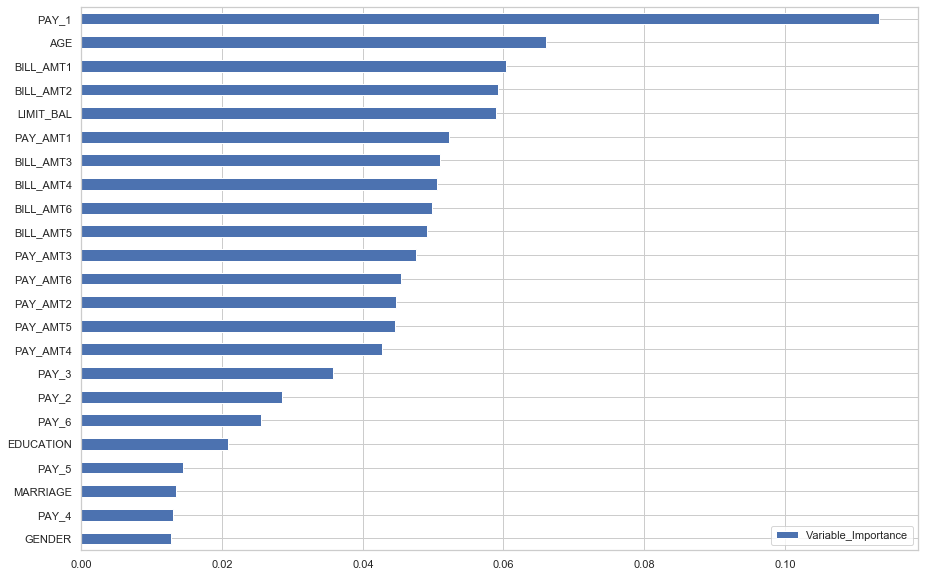

In [7]:
### NO CONSUMPTION!!! ###

# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]


# Data splitting for 80% Train/Val and 20% Test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=69) # 20% holdout 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state=69) # Train/Val


# Initializing the scaler  (Just scale every single time lol)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train_val.values)

## Scale the Predictors on the train/val dataset
X_train_scaled = std.transform(X_train_val.values) 

## This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(X_train_scaled, y_train_val) 

# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)
# Set seaborn contexts 
sns.set(style="whitegrid")

feature_importance.plot.barh(figsize=(15,10))

## Section 5.3: Refreshing our memory of Data_scale Vanilla

In [21]:
# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model using dataset with new features

# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)


# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale = df_models.drop('index', axis=1)
df_models_scale

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\meti

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\meti

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\li

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\.conda\envs\metis\li

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.757458,0.461551,0.590200,0.517790,0.737272,0
1,LogisticRegression,0.809667,0.710035,0.233521,0.351152,0.720868,0
2,KNN,0.790542,0.540198,0.339816,0.417066,0.702370,0
3,DecisionTree,0.724292,0.388009,0.413536,0.397023,0.611035,0
4,RandomForest,0.803667,0.611764,0.313758,0.414880,0.722469,0
5,LinearSVC,0.801750,0.727158,0.163261,0.266200,0.717927,0


# Section 6: Top 3 Model Selection on Finalized Dataset

## Section 6.1: Obtaining a better F1 Score- Optimizing leading 2 Models after GaussianNB on Current Dataset (HyperParameter Tuning)

In [8]:
# Previously, we already did GaussianNB with CV. in our previous rigorous model testing
# Remember all the scale, noscale, oversampling/undersampling/smote scale/noscale

In [9]:
# and we chose to use the dataset_scale with where the best F1 score, gaussian exists.
# however, other than gaussian, some models can still be optimized to improve their F1 score and possibly return
# us with a better model.

# so therefore, while guassianNB does have the best score, want to further validate if this model really is the best.

# Therefore, choose 2 more models (so altogether, top 3), and to tune their hyperparameters
# on a train/5fold cross-validation
# The other 2 models are KNN and Randomforest

In [10]:
# So now what's left is to tune the other 2 models to get a better F1 score
# Then from there, pick the model out of the 3 with the best F1 score for threshold tuning

# Use GridSearchCV on a split 80% train/val data
# knn -> best k -> get best F1 score
# randomfrest -> best estimators -> get best F1 score

In [11]:
# After collecting best F1 score
# do threshold tuning on confusion matrix to optimize for recall on model with best F1 score

#### We already have GaussianNB's CV'd F1 score = 0.5177 on the dataset_scale
GaussianNB_CV_dataset_scale_f1_score = 0.5177

In [13]:
with open('df_models_scale.pickle', 'rb') as read_file:
    df_models_scale = pickle.load(read_file)

In [14]:
# Revewing score of F1 score of all models on scaled dataset
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.757458,0.461551,0.590200,0.517790,0.737272,0
1,LogisticRegression,0.809667,0.710035,0.233521,0.351152,0.720868,0
2,KNN,0.790542,0.540198,0.339816,0.417066,0.702370,0
3,DecisionTree,0.723000,0.389315,0.409896,0.396293,0.609520,0
4,RandomForest,0.804125,0.606684,0.322357,0.423808,0.728102,0
5,LinearSVC,0.801125,0.726927,0.161617,0.265985,0.717503,0


### Section 6.1.2: k-NN with Scaled Dataset (Includes Scores from CV and TEST!)

In [22]:
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Splitting the data into 80% training/validation data and 20% testing data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Splitting the training data into 60% training data and 20% validation data.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)

### Run the cell below if you want to retrain your knn, but I wouldn't recommend it because it would take a million years. Only do it if you want to understand the training process

In [93]:
# # k-NN with GridSearchCV

# k_range = list(range(1,31))
# param_grid_knn = {
#     'n_neighbors':k_range
# }

# # Create a shuffled CV fold
# kf = KFold(n_splits=5, shuffle=True, random_state=1000) 

# # Initialize & Fit GridSearchCV on scaled data using k-NN
# grid_knn_cv = (GridSearchCV(estimator = KNeighborsClassifier(),
#                            param_grid = param_grid_knn,
#                            scoring='f1',
#                            cv = kf)
#                .fit(X_train_val, y_train_val))

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversi

In [20]:
# # Pickle Optimized k-NN
# import pickle
# with open('optimized_grid_knn_cv.pickle', 'wb') as to_write:
#     pickle.dump(grid_knn_cv, to_write)

# Loading pickled optimized k-NN
with open('optimized_grid_knn_cv.pickle', 'rb') as read_file:
    grid_knn_cv = pickle.load(read_file)

### Section 6.1.2.1: k-NN with Scaled Dataset (60% Train, 20% CV Scores)

In [24]:
# Examine Optimized KNN with it's associated best parameters
print("---------------------------------------------------------")
print("K-NN 60% TRAINING / 20% 5-FOLD CROSS-VALIDATION SCORES:")
print("---------------------------------------------------------")
print('Best Params for Optimized k-NN: {}\n'.format(grid_knn_cv.best_params_))
print('Best Estimator for Optimized k-NN: {}\n'.format(grid_knn_cv.best_estimator_))
print('F1 Score for Optimized k-NN: {}'.format(grid_knn_cv.best_score_))

---------------------------------------------------------
K-NN 60% TRAINING / 20% 5-FOLD CROSS-VALIDATION SCORES:
---------------------------------------------------------
Best Params for Optimized k-NN: {'n_neighbors': 13}

Best Estimator for Optimized k-NN: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

F1 Score for Optimized k-NN: 0.42725394222883295


### Section 6.1.2.2: k-NN with Scaled Dataset (80% Train, 20% Test Scores)

In [27]:
## FOR TESTING YOUR FINAL TRAINED MODEL ON 20% HOLDOUT DATA
y_pred_knn = grid_knn_cv.predict(X_test)

print("-----------------------------------")
print("KNN 80% TRAIN/ 20% TEST SCORES:")
print("-----------------------------------")

print('Accuracy Score for Optimized k-NN: {}'.format(accuracy_score(y_test, y_pred_knn)))
print('Precision Score for Optimized k-NN: {}'.format(precision_score(y_test, y_pred_knn)))
print('Recall Score for Optimized k-NN: {}\n'.format(recall_score(y_test, y_pred_knn)))

print('Classification report for Optimized k-NN:\n {}'.format(classification_report(y_test, y_pred_knn)))
print('Confusion Matrix for Optimized k-NN:\n {}'.format(confusion_matrix(y_test, y_pred_knn)))

-----------------------------------
KNN 80% TRAIN/ 20% TEST SCORES:
-----------------------------------
Accuracy Score for Optimized k-NN: 0.8095
Precision Score for Optimized k-NN: 0.6330645161290323
Recall Score for Optimized k-NN: 0.3512304250559284

Classification report for Optimized k-NN:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4659
           1       0.63      0.35      0.45      1341

    accuracy                           0.81      6000
   macro avg       0.73      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

Confusion Matrix for Optimized k-NN:
 [[4386  273]
 [ 870  471]]


In [39]:
# F1 score for k-NN Optimized improved from 0.42 in train/cv
# to 0.45 in test for predicting default = 1

### Section 6.1.3: RandomForest with Scaled Dataset (Includes Scores from CV and Test!)

In [28]:
# Data Splitting

# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Splitting the data into 80% training/validation data and 20% testing data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Splitting the training data into 60% training data and 20% validation data.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)

### Run the cell below if you want to retrain your randomforest, you crazy bastard

In [99]:
# # RandomForest with GridSearchCV

# # Prepare parameters into gridsearchcv
# param_grid_random_forest = {
#     'n_estimators': [100, 300, 500, 800, 1000],
#     'criterion': ['gini', 'entropy'],
#     'bootstrap': [True, False]
# }

# # Create a shuffled CV fold
# kf = KFold(n_splits=5, shuffle=True, random_state=1000) 

# # Initialize & Fit GridSearchCV on scaled data using RandomForestClassifier()
# grid_randomforest_cv = (GridSearchCV(estimator = RandomForestClassifier(),
#                                    param_grid = param_grid_random_forest,
#                                    scoring = 'f1',  # Scoring on F1
#                                    cv = kf)
#                         .fit(X_train_val, y_train_val))

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionW

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionW

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionW

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionW

In [29]:
# Pickle Optimized RandomForest
# import pickle
# with open('optimized_random_forest.pickle', 'wb') as to_write:
#     pickle.dump(grid_randomforest_cv, to_write)

# Loading pickled optimized randomforest
with open('optimized_random_forest.pickle', 'rb') as read_file:
    grid_randomforest_cv = pickle.load(read_file)


### Section 6.1.3.1: RandomForest with Scaled Dataset (60% Train, 20% CV Scores)

In [32]:
print("---------------------------------------------------------")
print("RandomForest 60% TRAINING / 20% 5-FOLD CROSS-VALIDATION SCORES:")
print("---------------------------------------------------------")
print('Best Params for Optimized k-NN: {}\n'.format(grid_randomforest_cv.best_params_))
print('Best Estimator for Optimized k-NN: {}\n'.format(grid_randomforest_cv.best_estimator_))
print('F1 Score for Optimized k-NN: {}'.format(grid_randomforest_cv.best_score_))

---------------------------------------------------------
RandomForest 60% TRAINING / 20% 5-FOLD CROSS-VALIDATION SCORES:
---------------------------------------------------------
Best Params for Optimized k-NN: {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 800}

Best Estimator for Optimized k-NN: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

F1 Score for Optimized k-NN: 0.4681382058059728


In [ ]:
# RandomForest Optimized F1 score for predicting default only 0.468

In [33]:
# PLOT YOUR CONFUSION MATRIX INSTEAD OF JUST THAT PRINTOUT BOX

### Section 6.1.3.2: RandomForest with Scaled Dataset (80% Train, 20% Test Scores)

In [34]:
## FOR TESTING YOUR FINAL TRAINED MODEL ON 20% HOLDOUT DATA
y_pred_random_forest = grid_randomforest_cv.predict(X_test)

print("-----------------------------------")
print("RandomForest 80% TRAIN/ 20% TEST SCORES:")
print("-----------------------------------")

print('Accuracy Score for Optimized k-NN: {}'.format(accuracy_score(y_test, y_pred_random_forest)))
print('Precision Score for Optimized k-NN: {}'.format(precision_score(y_test, y_pred_random_forest)))
print('Recall Score for Optimized k-NN: {}\n'.format(recall_score(y_test, y_pred_random_forest)))

print('Classification report for Optimized k-NN:\n {}'.format(classification_report(y_test, y_pred_random_forest)))
print('Confusion Matrix for Optimized k-NN:\n {}'.format(confusion_matrix(y_test, y_pred_random_forest)))

-----------------------------------
RandomForest 80% TRAIN/ 20% TEST SCORES:
-----------------------------------
Accuracy Score for Optimized k-NN: 0.8186666666666667
Precision Score for Optimized k-NN: 0.6575342465753424
Recall Score for Optimized k-NN: 0.39373601789709173

Classification report for Optimized k-NN:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4659
           1       0.66      0.39      0.49      1341

    accuracy                           0.82      6000
   macro avg       0.75      0.67      0.69      6000
weighted avg       0.80      0.82      0.80      6000

Confusion Matrix for Optimized k-NN:
 [[4384  275]
 [ 813  528]]


In [38]:
# F1 score for RandomForest Optimized improved from 0.468 in train/cv
# to 0.49 in test for predicting default = 1

In [6]:
# PLOT YOUR CONFUSION MATRIX INSTEAD OF JUST THAT PRINTOUT BOX

In [ ]:
# Optimize for Recall (because better to catch more people who are predicted to be defaulters but aren't)
# Than to miss more people who are predicted to be non-defaulters but are

## Section 6.2: Selecting the Model with the best F1 score

In [42]:
df_models_scale  # From all the mega test

,model,accuracy,precision,recall,f1score,rocauc,timetaken
0,GaussianNB,0.757458,0.461551,0.590200,0.517790,0.737272,0
1,LogisticRegression,0.809667,0.710035,0.233521,0.351152,0.720868,0
2,KNN,0.790542,0.540198,0.339816,0.417066,0.702370,0
3,DecisionTree,0.724292,0.388009,0.413536,0.397023,0.611035,0
4,RandomForest,0.803667,0.611764,0.313758,0.414880,0.722469,0
5,LinearSVC,0.801750,0.727158,0.163261,0.266200,0.717927,0


In [35]:
# Results from trying to optimize top 3

# Create a bloody table for this
# We see that after hyperparam tuning   (this is still the F1 model selection)
# gaussian f1 = 0.5177
# knn f1 = 0.427
# randomforest f1 = 0.468

### Brief Explanation:
mother fucker I do so much in the end gaussianNB works the best

More Presentation-friendly:
- We can see from the above that GaussianNB still takes the lead at F1 = 0.5177

# Section 7: Threshold tuning for GaussianNB, the best model

### Section 7.1: GaussianNB with Scaled Dataset 80% of the data (60% train and 20% cross-validation here!)
Threshold best param tuning. after getting best threshold, this is our TRAINED MODEL that we WANT TO TRY AND USE IN PRODUCTION.  
So using our trained model, we test it with all it's tuned parameters on unseen data

In [11]:
def model_threshold_tuning(model, X, y, n_splits, model_name):
    import time
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_val)[:,1] >= th)
            f1scor = f1_score(y_val, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])
        
    print('\n')
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    accuracy      = model.score(X_val, y_val)
    print('Validation set: {:.2f}%'.format(100*accuracy))   # should use cross validation

    
    # Confusion Matrix at th = 0.25
    y_pred = (model.predict_proba(X_val)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_val, y_pred), recall_score(y_val, y_pred), f1_score(y_val, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_val, y_pred))

    # Confusion Matrix at th = 0.5
    y_pred = model.predict(X_val)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_val, y_pred), recall_score(y_val, y_pred), f1_score(y_val, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_val, y_pred))

    # Confusion Matrix at th = 0.75
    y_pred = (model.predict_proba(X_val)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_val, y_pred), recall_score(y_val, y_pred), f1_score(y_val, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_val, y_pred))

    
    # Confusion Matrix at optimal th
    y_pred = (model.predict_proba(X_val)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_val, y_pred)
    recall       = recall_score(y_val, y_pred)
    f1score      = f1_score(y_val, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_val, y_pred))
    
    
    y_pred = model.predict_proba(X_val)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    rocauc       = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(rocauc))

    
    df_model = pd.DataFrame({'model'        : [model_name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'timetaken'    : [1000]})   # timetaken for comparison later
    return df_model

In [13]:
# PLOT CONFUSION MATRIX INSTEAD OF THE PRINTOUT BOX

In [14]:
############### KEEP IN MIND THIS IS THE SETTING YOU SHOULD USE ON YOUR TEST DATA!! #######################

# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

print('\n"""""" GaussianNB """"""')
time1 = time.time()
gnb = GaussianNB()
model_threshold_ranges = model_threshold_tuning(gnb, X, y, 5, 'GaussianNB')
model_threshold_ranges.timetaken[0] = time.time() - time1


"""""" GaussianNB """"""

Looping decimal place 1
0.000->0.3604,  0.100->0.3893,  0.200->0.4141,  0.300->0.4500,  0.400->0.4942,  0.500->0.5073,  0.600->0.5095,  0.700->0.5036,  0.800->0.4971,  0.900->0.4717,  1.000->0.2716,  
Looping decimal place 2
0.500->0.5073,  0.510->0.5091,  0.520->0.5091,  0.530->0.5094,  0.540->0.5075

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,  0.550->0.5095,  0.560->0.5087,  0.570->0.5100,  0.580->0.5124,  0.590->0.5097,  0.600->0.5095,  0.610->0.5112,  0.620->0.5105,  0.630->0.5108,  0.640->0.5090,  0.650->0.5086,  0.660->0.5089,  0.670->0.5052,  0.680->0.5040,  0.690->0.5040,  0.700->0.5036,  
Looping decimal place 3
0.570->0.5100,  0.571->0.5098,  0.572->0.5101,  0.573->0.5103,  0.574->0.5108,  0.575->0.5110,  0.576->0.5119,  0.577->0.5121,  0.578->0.5121,  0.579->0.5121,  0.580->0.5124,  0.581->0.5124,  0.582->0.5117,  0.583->0.5113,  0.584->0.5113,  0.585->0.5110,  0.586->0.5106,  0.587->0.5106,  0.588->0.5108,  0.589->0.5104,  0.590->0.5097,  

optimal F1 score = 0.5124
optimal threshold = 0.580
GaussianNB accuracy score is
Training: 76.15%
Validation set: 76.08%

Adjust threshold to 0.25:
Precision: 0.2964,   Recall: 0.7635,   F1 Score: 0.4270
GaussianNB confusion matrix: 
 [[1934 1847]
 [ 241  778]]

Default threshold of 0.50:
Precision: 0.4508,   Recall: 0.5800,   F1 Score: 0.5073
GaussianNB confusion matrix: 
 [

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [59]:
# Plotting Confusion Matrix with the thresholds

# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Initializing model
gnb = GaussianNB()

In [96]:
def make_confusion_matrix(model, X, y, threshold=0.5):
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=69)
    
    model.fit(X_train, y_train)
    
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)  # This line is important
    # Converts your probabilities into True and False
    # model.predict_proba(X_test) print this one out first
    # model.predict_proba(X_test)[:, 1] then this one
    # model.predict_proba(X_test)[:, 1] >= threshold then this one
    
    fraud_confusion = confusion_matrix(y_val, y_predict)
    fig, ax = plt.subplots(dpi=80)    
    g = sns.heatmap(fraud_confusion, cmap=plt.cm.Reds, annot=True, annot_kws={"size":20}, square=True, fmt='d',
                    xticklabels=['No Default', 'Default'],
                    yticklabels=['No Default', 'Default']);

    # Changing the size of the xticks and ytick labels
    ax.set_yticklabels(g.get_yticklabels(), rotation=90, size=10);
    ax.set_xticklabels(g.get_xticklabels(), size=10);
    
#     ax.xaxis.label.set_color('white')
#     ax.tick_params(axis='x', colors='white')
    
#     ax.yaxis.label.set_color('white')
#     ax.tick_params(axis='y', colors='white')
    
    # Changing axis orientation & setting titles
    ax.set_xlabel('Prediction', size=15)
    ax.set_ylabel('Actual', rotation=0, labelpad=40,size=15)
    
    
    # Prevent Heatmap Cut-Off Issue
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


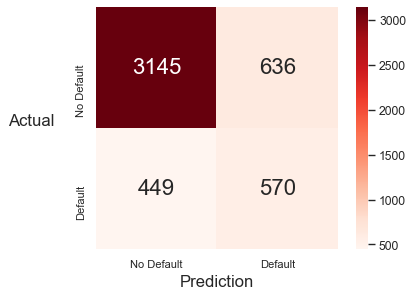

In [97]:
# For th = 0.58, f1 = 0.51
make_confusion_matrix(gnb, X, y, 0.58)

plt.savefig('confusion_matrix_th_0.58.png', transparent = True)

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


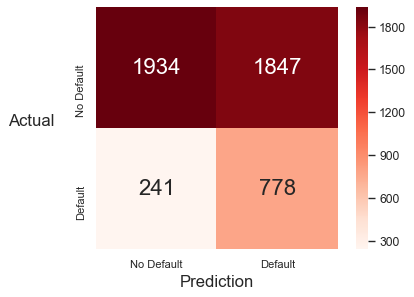

In [98]:
# For th = 0.25, f1 = 0.43
make_confusion_matrix(gnb, X, y, 0.25)
plt.savefig('confusion_matrix_th_0.25.png', transparent = True)

In [15]:
# Since we are motherfucking tuning for best recall, a threshold of 0.25 will provide us with a pretty
# Damn good recall
# AUC is 0.7353. So it is still better than a random guess!

# Section 8: Final Model 80% Training / 20% Testing WOOHOOO FUKYEA

## Section 8.1: Split data into Train/Test set & Scale

In [27]:
# Data Splitting

# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# Splitting the data into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

## Section 8.2: GaussianNB using optimal threshold

In [28]:
# Now fit gaussian with the above optimized threshold and test it on your 20% holdout data

In [29]:
# Initialize GaussianNB
gnb = GaussianNB()

# Train GaussianNB on 80% of data
gnb_finalized = gnb.fit(X_train, y_train)


# Use optimized threshold found in 60% train / 20% cross validation to make predictions
optimal_th = 0.25
y_pred = (gnb_finalized.predict_proba(X_test)[:,1] >= optimal_th)

# Plotting AUC Metrics
y_pred_auc = gnb_finalized.predict_proba(X_test)[:,1]   
fpr, tpr, thresholds = roc_curve(y_test, y_pred_auc)
rocauc               = auc(fpr, tpr)

# Score model
print("------------------------------------------------------------------")
print("GaussianNB (with optimized threshold) 80% TRAIN/ 20% TEST SCORES:")
print("------------------------------------------------------------------")
print('\n')
print('Optimal Threshold = {:.3f}'.format(optimal_th))
print('F1 score = {:.4f}'.format(f1_score(y_test, y_pred)))
print('AUC score: {:.4f}'.format(rocauc))
print('\n')
print('Accuracy Score for GaussianNB: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision Score for GaussianNB: {}'.format(precision_score(y_test, y_pred)))
print('Recall Score for GaussianNB: {}\n'.format(recall_score(y_test, y_pred)))

print('Classification report for Optimized GaussianNB:\n {}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix for GaussianNB:\n {}'.format(confusion_matrix(y_test, y_pred)))

------------------------------------------------------------------
GaussianNB (with optimized threshold) 80% TRAIN/ 20% TEST SCORES:
------------------------------------------------------------------


Optimal Threshold = 0.250
F1 score = 0.4475
AUC score: 0.7515


Accuracy Score for GaussianNB: 0.5645
Precision Score for GaussianNB: 0.3122786304604486
Recall Score for GaussianNB: 0.7889634601043997

Classification report for Optimized GaussianNB:
               precision    recall  f1-score   support

           0       0.89      0.50      0.64      4659
           1       0.31      0.79      0.45      1341

    accuracy                           0.56      6000
   macro avg       0.60      0.64      0.54      6000
weighted avg       0.76      0.56      0.60      6000

Confusion Matrix for GaussianNB:
 [[2329 2330]
 [ 283 1058]]


C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
# Initialize Finalized GaussianNB
gnb_final = GaussianNB()

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


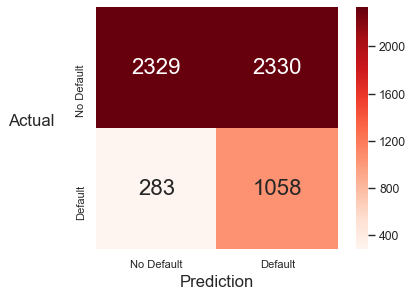

In [102]:
make_confusion_matrix_final(gnb_final, X, y, threshold=0.25)
plt.savefig('final_confusion_matrix_th_0.25.png', transparent=True)

In [101]:
def make_confusion_matrix_final(model, X, y, threshold=0.5):
    
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
    
    model.fit(X_train, y_train)
    
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)  # This line is important
    # Converts your probabilities into True and False
    # model.predict_proba(X_test) print this one out first
    # model.predict_proba(X_test)[:, 1] then this one
    # model.predict_proba(X_test)[:, 1] >= threshold then this one
    
    fraud_confusion = confusion_matrix(y_test, y_predict)
    fig, ax = plt.subplots(dpi=80)    
    g = sns.heatmap(fraud_confusion, cmap=plt.cm.Reds, annot=True, annot_kws={"size":20}, square=True, fmt='d',
                    xticklabels=['No Default', 'Default'],
                    yticklabels=['No Default', 'Default']);

    # Changing the size of the xticks and ytick labels
    ax.set_yticklabels(g.get_yticklabels(), rotation=90, size=10);
    ax.set_xticklabels(g.get_xticklabels(), size=10);
    
#     ax.xaxis.label.set_color('white')
#     ax.tick_params(axis='x', colors='white')
    
#     ax.yaxis.label.set_color('white')
#     ax.tick_params(axis='y', colors='white')
    
    # Changing axis orientation & setting titles
    ax.set_xlabel('Prediction', size=15)
    ax.set_ylabel('Actual', rotation=0, labelpad=40,size=15)
    
    
    # Prevent Heatmap Cut-Off Issue
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

# Section 9: Results Interpretation

## Section 9.1: Feature Importance

In [8]:
df.rename(columns={'PAY_1':'PAY_STATUS_1_MONTH_BEFORE',
                   'PAY_2':'PAY_STATUS_2_MONTH_BEFORE',
                   'PAY_3':'PAY_STATUS_3_MONTH_BEFORE',
                   'PAY_4':'PAY_STATUS_4_MONTH_BEFORE',
                   'PAY_5':'PAY_STATUS_5_MONTH_BEFORE',
                   'PAY_6':'PAY_STATUS_6_MONTH_BEFORE',
                   'BILL_AMT1': 'BILL_AMT_1_MONTH_BEFORE',
                   'BILL_AMT2': 'BILL_AMT_2_MONTH_BEFORE',
                   'BILL_AMT3': 'BILL_AMT_3_MONTH_BEFORE',
                   'BILL_AMT4': 'BILL_AMT_4_MONTH_BEFORE',
                   'BILL_AMT5': 'BILL_AMT_5_MONTH_BEFORE',
                   'BILL_AMT6': 'BILL_AMT_6_MONTH_BEFORE',
                   'PAY_AMT1': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT2': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT3': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT4': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT5': 'PAY_AMT_6_MONTH_BEFORE',
                   'PAY_AMT6': 'PAY_AMT_6_MONTH_BEFORE',
                  },inplace=True)

In [9]:
df.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_STATUS_1_MONTH_BEFORE', 'PAY_STATUS_2_MONTH_BEFORE',
       'PAY_STATUS_3_MONTH_BEFORE', 'PAY_STATUS_4_MONTH_BEFORE',
       'PAY_STATUS_5_MONTH_BEFORE', 'PAY_STATUS_6_MONTH_BEFORE',
       'BILL_AMT_1_MONTH_BEFORE', 'BILL_AMT_2_MONTH_BEFORE',
       'BILL_AMT_3_MONTH_BEFORE', 'BILL_AMT_4_MONTH_BEFORE',
       'BILL_AMT_5_MONTH_BEFORE', 'BILL_AMT_6_MONTH_BEFORE',
       'PAY_AMT_6_MONTH_BEFORE', 'PAY_AMT_6_MONTH_BEFORE',
       'PAY_AMT_6_MONTH_BEFORE', 'PAY_AMT_6_MONTH_BEFORE',
       'PAY_AMT_6_MONTH_BEFORE', 'PAY_AMT_6_MONTH_BEFORE', 'DEFAULT'],
      dtype='object')

In [11]:
sns.set_style("whitegrid", {'axes.grid' : False})

C:\Users\User\.conda\envs\metis\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\.conda\envs\metis\lib\site-packages\ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


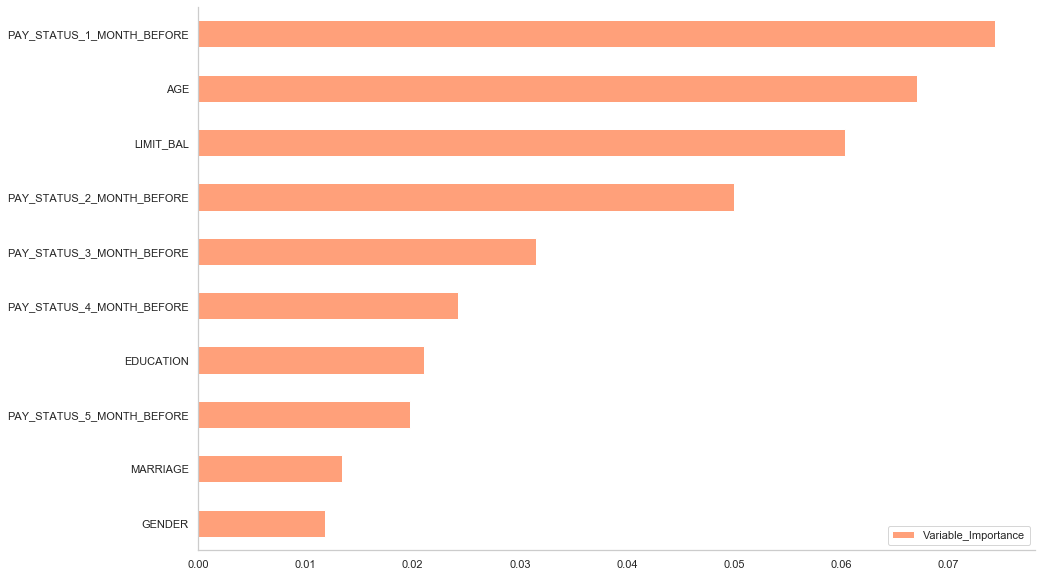

In [87]:
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]


# Split using train-test-split just because I want to get the columns to use for later
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Initializing the scaler  (Just scale every single time lol)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors on the train/val dataset
X = std.transform(X.values) 

## This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(X, y) 

# Obtain the feature importance
feature_importance = pd.DataFrame(rf.feature_importances_[:10],
                                   index = X_train_val.columns[:10],  # use X_train_val just for getting the name of the columns back
                                   columns=['Variable_Importance']).sort_values('Variable_Importance',ascending=True)
# Set seaborn contexts 
feature_importance.plot.barh(figsize=(15,10),color='lightsalmon')
sns.despine()

plt.savefig('feature_importance.png', transparent = True) 

## Section 9.2: Plotting out the relationship of Variables to Target

In [7]:
df.columns

Index(['LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [8]:
sns.set_style("whitegrid", {'axes.grid' : False})

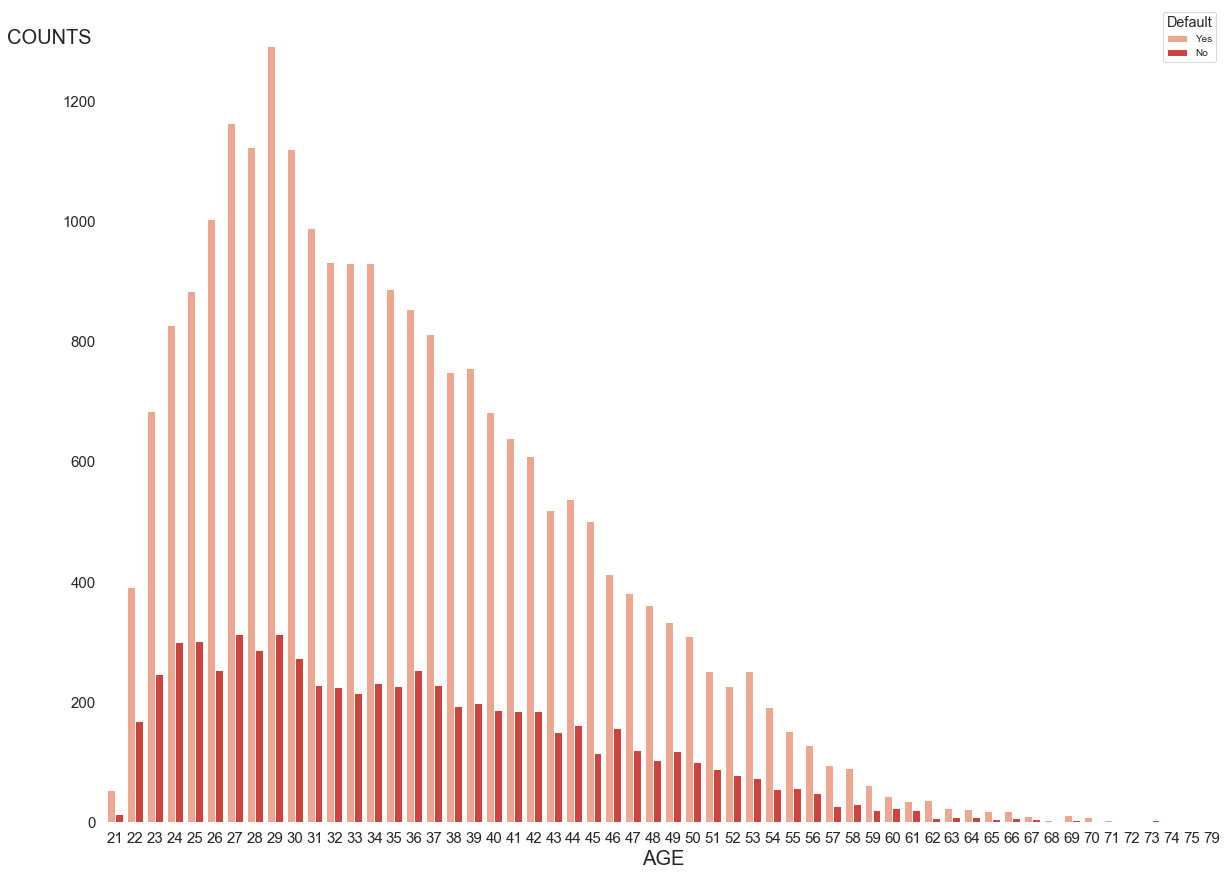

In [15]:
# By Age
fig, axz = plt.subplots(figsize=(20,15))

sns.despine(fig=fig, left=True, bottom=True)
axz = sns.countplot(x='AGE', hue='DEFAULT', data=df, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40,size=20)
axz.set_xlabel('AGE', size=20)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white',fontsize=10);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


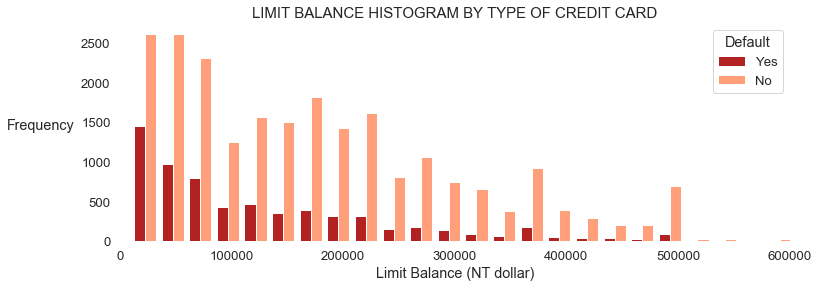

In [22]:
# Can we infer more? what about the columns for lIMIT_BALANCE?
x1 = list(df[df['DEFAULT'] == 1]['LIMIT_BAL'])
x2 = list(df[df['DEFAULT'] == 0]['LIMIT_BAL'])

fig2, ax_lim_bal = plt.subplots(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, normed=False, color=['firebrick', 'lightsalmon'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency', rotation=0,labelpad=40)
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

In [ ]:
## Figure out how to do this one!!

# Final - Section 10: Learning Points 

### Encoding Variables
- For instance, in the marriage column, you had values that were 1, 2, 3.
- These shouldn't be left in the column itself. There should be dummy variables done on this!
- All the variables that include this are:

1. Education
2. Payment Status (pay_1, pay_2, .., etc.)
3. Gender
4. Marriage

## Moving forward, what can we do with this data?
- Projects should always go beyond just what your model shits out.
- It should be for a greater cause -- what can you do with the data that your model shits out?

## Section 9.3: Plotting out AUC of GaussianNB